In [1]:
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

from scipy.spatial import KDTree


import collections

import scipy.stats as st

from pyFIT3D.common.tools import read_flux_elines


1.1.1
1.1.1


<ipython-input-1-82db6a3312b5>:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
def FE_LONG_to_tab(name='manga-9675-9102',dir_fits="fitsfiles/",
                   list_keys=['3728.82', '4861.36', '5006.84', '6300.3',\
                              '6562.85', '6583.45', '6716.44', '6730.82',\
                              '9069.0','9531.1'],\
                  list_names=['[OII]3727','Hb','[OIII]5007','[OI]6300','Ha',\
                        '[NII]6284','[SII]6717','[SII]6731','[SIII]9069',\
                              '[SIII]9531']):
    flux_elines=read_flux_elines(fe_file)
    hdr=flux_elines[1]
    nx=hdr['NAXIS1']
    ny=hdr['NAXIS2']
    crval1=hdr['CRVAL1']
    crpix1=hdr['CRPIX1']
    cdelt1=hdr['CD1_1']
    crval2=hdr['CRVAL2']
    crpix2=hdr['CRPIX2']
    cdelt2=hdr['CD2_2']
    ra=[]
    dec=[]
    ind=[]
    gal=[]
    for j in arange(0,ny):
        for i in arange(0,nx):
            ra.append(crval1+cdelt1*(i-crpix1-1))
            dec.append(crval2+cdelt2*(j-crpix2-1))
            ind.append(f'{name}_{i}_{j}')
            gal.append(name)
    tab_fe = Table((gal,ind,ra,dec),names=('NAME','IND','RA','DEC'))

    for key,e_name in zip(list_keys,list_names):
        flux_elines_now=flux_elines[0][key]
        flux = flux_elines_now['flux'].flatten()
        e_flux = flux_elines_now['e_flux'].flatten()
        vel = flux_elines_now['vel'].flatten()
        e_vel = flux_elines_now['e_vel'].flatten()
        disp = flux_elines_now['disp'].flatten()
        EW = flux_elines_now['EW'].flatten()
        e_disp = flux_elines_now['e_disp'].flatten()
        e_EW = flux_elines_now['e_EW'].flatten()
        names=[f'flux_{e_name}',f'e_flux_{e_name}',
               f'vel_{e_name}',f'e_vel_{e_name}',
               f'disp_{e_name}',f'e_dis_{e_name}',
               f'EW_{e_name}',f'e_EW_{e_name}']
        tab_fe.add_columns((flux,e_flux,vel,e_vel,disp,e_disp,EW,e_EW),names=names)
    mask_EW = np.isfinite(tab_fe['EW_[OII]3727'].value)
    tab_fe = tab_fe[mask_EW]
    return tab_fe


In [23]:
list_keys=['3728.82', '4861.36', '5006.84', '6300.3', '6562.85', '6583.45', '6716.44', '6730.82', '9069.0','9531.1']
list_names=['[OII]3727','Hb','[OIII]5007','[OI]6300','Ha','[NII]6284','[SII]6717','[SII]6731','[SIII]9069','[SIII]9531']

tab_now=FE_LONG_to_tab(name='manga-9675-9102',dir_fits="fitsfiles/",
                   list_keys=list_keys,\
                  list_names=list_names)
tab_now

NAME,IND,RA,DEC,flux_[OII]3727,e_flux_[OII]3727,vel_[OII]3727,e_vel_[OII]3727,disp_[OII]3727,e_dis_[OII]3727,EW_[OII]3727,e_EW_[OII]3727,flux_Hb,e_flux_Hb,vel_Hb,e_vel_Hb,disp_Hb,e_dis_Hb,EW_Hb,e_EW_Hb,flux_[OIII]5007,e_flux_[OIII]5007,vel_[OIII]5007,e_vel_[OIII]5007,disp_[OIII]5007,e_dis_[OIII]5007,EW_[OIII]5007,e_EW_[OIII]5007,flux_[OI]6300,e_flux_[OI]6300,vel_[OI]6300,e_vel_[OI]6300,disp_[OI]6300,e_dis_[OI]6300,EW_[OI]6300,e_EW_[OI]6300,flux_Ha,e_flux_Ha,vel_Ha,e_vel_Ha,disp_Ha,e_dis_Ha,EW_Ha,e_EW_Ha,flux_[NII]6284,e_flux_[NII]6284,vel_[NII]6284,e_vel_[NII]6284,disp_[NII]6284,e_dis_[NII]6284,EW_[NII]6284,e_EW_[NII]6284,flux_[SII]6717,e_flux_[SII]6717,vel_[SII]6717,e_vel_[SII]6717,disp_[SII]6717,e_dis_[SII]6717,EW_[SII]6717,e_EW_[SII]6717,flux_[SII]6731,e_flux_[SII]6731,vel_[SII]6731,e_vel_[SII]6731,disp_[SII]6731,e_dis_[SII]6731,EW_[SII]6731,e_EW_[SII]6731,flux_[SIII]9069,e_flux_[SIII]9069,vel_[SIII]9069,e_vel_[SIII]9069,disp_[SIII]9069,e_dis_[SIII]9069,EW_[SIII]9069,e_EW_[SIII]9069,flux_[SIII]9531,e_flux_[SIII]9531,vel_[SIII]9531,e_vel_[SIII]9531,disp_[SIII]9531,e_dis_[SIII]9531,EW_[SIII]9531,e_EW_[SIII]9531
str15,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
manga-9675-9102,manga-9675-9102_19_6,56.842523446,68.041988997,-0.2856971965593346,0.19593718488082187,-52.46979864564637,18.70340237720972,4.078667960675236,0.4080333134945966,0.0,-26933.49108549599,-0.029913257117844493,0.07664482498664844,47.94751826811513,8.039853287255927,4.078667960675236,0.40789260398271704,0.0,2.5999060011645945,-0.08958861368272139,0.04800649734876944,-52.280430484424436,6.055495269069657,4.078667960675236,0.4078766790673698,0.0,0.10101537495547674,-0.033943410071865375,0.04730455341048703,43.1036228851727,5.50472943818446,4.078667960675236,0.40787470280496185,0.0,1.5093620633449727,0.0045764385197695386,0.056707550134440635,-24.486966733677075,11.20516251986439,4.990904516775174,0.756290137861286,0.0,3.3538080013782903,0.03398352272863343,0.02304051918381288,46.30112662137124,5.607360896638571,3.0555461892497227,0.3450787010616243,0.0,2.3081782486058713,0.04365401740056019,0.024829825544007485,68.2840746787846,6.811655388307091,4.208577027081439,0.48175237839044543,-2.3667266447270747,2.072058455186366,0.005262181894849959,0.07284754744840245,23.616362283939758,12.699883453167152,10.592030713381883,2.1091724088953376,0.0,3.7064080064243092,0.01071576117247942,0.025113075444971836,86.43442165554602,11.09872636577417,6.656211949764004,1.2137468959676758,0.0,2.0899278925564873,-0.0034446807238621034,0.028615959492943082,40.57777281742184,9.544170841524004,4.078667960675236,0.55097785294081,0.0,1.7538423938393422
manga-9675-9102,manga-9675-9102_20_6,56.842384556999995,68.041988997,-1.611841244759908,0.5598946604507261,-64.25023933719224,7.89639715426732,4.078667960675236,0.4092518259208836,0.0,-483.6670019006484,-0.01811615136102234,0.0764988556703803,38.61444776001882,6.360109314448247,4.078667960675236,0.40789261816780037,0.0,3.699440152345008,-0.0776430650270034,0.04818397921972905,-43.69556010277524,6.41366781994606,4.078667960675236,0.4078767416343037,0.0,0.37374143536036897,-0.025350187688440357,0.04699569906543041,41.01044897343867,7.015467329484642,4.078667960675236,0.40787507552528096,0.0,1.73272693081603,0.005287401721183281,0.04911274919239384,-37.8006654774521,12.319180122788241,4.448293687363076,0.7066273579501817,0.0,2.95922885

In [13]:
name='manga-9675-9102'
dir_fits="fitsfiles/"
fe_file=dir_fits+"/flux_elines_long."+name+".cube.fits.gz"
#fe_hdu=fits.open(fe_file)
flux_elines=read_flux_elines(fe_file)
hdr=flux_elines[1]
print(hdr['NAXIS'])
nx=hdr['NAXIS1']
ny=hdr['NAXIS2']
crval1=hdr['CRVAL1']
crpix1=hdr['CRPIX1']
cdelt1=hdr['CD1_1']
crval2=hdr['CRVAL2']
crpix2=hdr['CRPIX2']
cdelt2=hdr['CD2_2']


3


In [14]:
list_keys=['3728.82', '4861.36', '5006.84', '6300.3', '6562.85', '6583.45', '6716.44', '6730.82', '9069.0','9531.1']
list_names=['[OII]3727','Hb','[OIII]5007','[OI]6300','Ha','[NII]6284','[SII]6717','[SII]6731','[SIII]9069','[SIII]9531']

In [15]:
print(list(flux_elines[3]['3686.83'].keys()))

['flux', 'vel', 'disp', 'EW', 'e_flux', 'e_vel', 'e_disp', 'e_EW']


In [16]:
ra=[]
dec=[]
ind=[]
gal=[]
for j in arange(0,ny):
    for i in arange(0,nx):
        ra.append(crval1+cdelt1*(i-crpix1-1))
        dec.append(crval2+cdelt2*(j-crpix2-1))
        ind.append(f'{name}_{i}_{j}')
        gal.append(name)
tab_fe = Table((gal,ind,ra,dec),names=('NAME','IND','RA','DEC'))

for key,e_name in zip(list_keys,list_names):
    flux_elines_now=flux_elines[0][key]
    flux = flux_elines_now['flux'].flatten()
    e_flux = flux_elines_now['e_flux'].flatten()
    vel = flux_elines_now['vel'].flatten()
    e_vel = flux_elines_now['e_vel'].flatten()
    disp = flux_elines_now['disp'].flatten()
    EW = flux_elines_now['EW'].flatten()
    e_disp = flux_elines_now['e_disp'].flatten()
    e_EW = flux_elines_now['e_EW'].flatten()
    names=[f'flux_{e_name}',f'e_flux_{e_name}',
           f'vel_{e_name}',f'e_vel_{e_name}',
           f'disp_{e_name}',f'e_dis_{e_name}',
           f'EW_{e_name}',f'e_EW_{e_name}']
    tab_fe.add_columns((flux,e_flux,vel,e_vel,disp,e_disp,EW,e_EW),names=names)
    
mask_EW = np.isfinite(tab_fe['EW_[OII]3727'].value)
#    e_flux = []
#    vel = []
#    EW = []
#    for i in arange(0,nx):
#        for j in arange(0,ny):
#            flux.

tab_fe = tab_fe[mask_EW]
print(len(tab_fe))

2348


In [17]:
#print(tab_fe['EW_[OII]3727'][mask_EW])

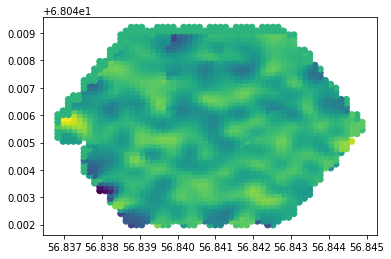

In [18]:
plt.scatter(tab_fe['RA'],tab_fe['DEC'],c=tab_fe['flux_[OII]3727'])

In [8]:
tab_fe

NAME,IND,RA,DEC,flux_[OII]3727,e_flux_[OII]3727,vel_[OII]3727,e_vel_[OII]3727,disp_[OII]3727,e_dis_[OII]3727,EW_[OII]3727,e_EW_[OII]3727,flux_Hb,e_flux_Hb,vel_Hb,e_vel_Hb,disp_Hb,e_dis_Hb,EW_Hb,e_EW_Hb,flux_[OIII]5007,e_flux_[OIII]5007,vel_[OIII]5007,e_vel_[OIII]5007,disp_[OIII]5007,e_dis_[OIII]5007,EW_[OIII]5007,e_EW_[OIII]5007,flux_[OI]6300,e_flux_[OI]6300,vel_[OI]6300,e_vel_[OI]6300,disp_[OI]6300,e_dis_[OI]6300,EW_[OI]6300,e_EW_[OI]6300,flux_Ha[NII]6284,e_flux_Ha[NII]6284,vel_Ha[NII]6284,e_vel_Ha[NII]6284,disp_Ha[NII]6284,e_dis_Ha[NII]6284,EW_Ha[NII]6284,e_EW_Ha[NII]6284,flux_[SII]6717,e_flux_[SII]6717,vel_[SII]6717,e_vel_[SII]6717,disp_[SII]6717,e_dis_[SII]6717,EW_[SII]6717,e_EW_[SII]6717,flux_[SII]6731,e_flux_[SII]6731,vel_[SII]6731,e_vel_[SII]6731,disp_[SII]6731,e_dis_[SII]6731,EW_[SII]6731,e_EW_[SII]6731,flux_[SIII]9069,e_flux_[SIII]9069,vel_[SIII]9069,e_vel_[SIII]9069,disp_[SIII]9069,e_dis_[SIII]9069,EW_[SIII]9069,e_EW_[SIII]9069,flux_[SIII]9531,e_flux_[SIII]9531,vel_[SIII]9531,e_vel_[SIII]9531,disp_[SIII]9531,e_dis_[SIII]9531,EW_[SIII]9531,e_EW_[SIII]9531
str15,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
manga-9675-9102,manga-9675-9102_19_6,56.842523446,68.041988997,-0.2856971965593346,0.19593718488082187,-52.46979864564637,18.70340237720972,4.078667960675236,0.4080333134945966,0.0,-26933.49108549599,-0.029913257117844493,0.07664482498664844,47.94751826811513,8.039853287255927,4.078667960675236,0.40789260398271704,0.0,2.5999060011645945,-0.08958861368272139,0.04800649734876944,-52.280430484424436,6.055495269069657,4.078667960675236,0.4078766790673698,0.0,0.10101537495547674,-0.033943410071865375,0.04730455341048703,43.1036228851727,5.50472943818446,4.078667960675236,0.40787470280496185,0.0,1.5093620633449727,0.0045764385197695386,0.056707550134440635,-24.486966733677075,11.20516251986439,4.990904516775174,0.756290137861286,0.0,3.3538080013782903,0.03398352272863343,0.02304051918381288,46.30112662137124,5.607360896638571,3.0555461892497227,0.3450787010616243,0.0,2.3081782486058713,0.04365401740056019,0.024829825544007485,68.2840746787846,6.811655388307091,4.208577027081439,0.48175237839044543,-2.3667266447270747,2.072058455186366,0.005262181894849959,0.07284754744840245,23.616362283939758,12.699883453167152,10.592030713381883,2.1091724088953376,0.0,3.7064080064243092,0.01071576117247942,0.025113075444971836,86.43442165554602,11.09872636577417,6.656211949764004,1.2137468959676758,0.0,2.0899278925564873
manga-9675-9102,manga-9675-9102_20_6,56.842384556999995,68.041988997,-1.611841244759908,0.5598946604507261,-64.25023933719224,7.89639715426732,4.078667960675236,0.4092518259208836,0.0,-483.6670019006484,-0.01811615136102234,0.0764988556703803,38.61444776001882,6.360109314448247,4.078667960675236,0.40789261816780037,0.0,3.699440152345008,-0.0776430650270034,0.04818397921972905,-43.69556010277524,6.41366781994606,4.078667960675236,0.4078767416343037,0.0,0.37374143536036897,-0.025350187688440357,0.04699569906543041,41.01044897343867,7.015467329484642,4.078667960675236,0.40787507552528096,0.0,1.73272693081603,0.005287401721183281,0.04911274919239384,-37.8006654774521,12.319180122788241,4.448293687363076,0.7066273579501817,0.0,2.9592288584790416,0.04169828539632709,0.024886971641211186,56.422025561861005,5.160897158556955,3.312043974701958,0.3884196595125536,0.0,2.5367563195764524,0.04473792900868687,0.023861670038500853,82.8564028222079,7.566240468407701,4.250691997462392,0.46744225

In [40]:
print(flux_elines[3])

{'3686.83': {'flux': 'flux HI', 'vel': 'vel HI', 'disp': 'disp HI', 'EW': 'EW HI', 'e_flux': 'e_flux HI', 'e_vel': 'e_vel HI', 'e_disp': 'e_disp HI', 'e_EW': 'e_EW HI'}, '3691.56': {'flux': 'flux HI', 'vel': 'vel HI', 'disp': 'disp HI', 'EW': 'EW HI', 'e_flux': 'e_flux HI', 'e_vel': 'e_vel HI', 'e_disp': 'e_disp HI', 'e_EW': 'e_EW HI'}, '3697.15': {'flux': 'flux HI', 'vel': 'vel HI', 'disp': 'disp HI', 'EW': 'EW HI', 'e_flux': 'e_flux HI', 'e_vel': 'e_vel HI', 'e_disp': 'e_disp HI', 'e_EW': 'e_EW HI'}, '3703.85': {'flux': 'flux HI', 'vel': 'vel HI', 'disp': 'disp HI', 'EW': 'EW HI', 'e_flux': 'e_flux HI', 'e_vel': 'e_vel HI', 'e_disp': 'e_disp HI', 'e_EW': 'e_EW HI'}, '3711.97': {'flux': 'flux HI', 'vel': 'vel HI', 'disp': 'disp HI', 'EW': 'EW HI', 'e_flux': 'e_flux HI', 'e_vel': 'e_vel HI', 'e_disp': 'e_disp HI', 'e_EW': 'e_EW HI'}, '3726.03': {'flux': 'flux [OII]', 'vel': 'vel [OII]', 'disp': 'disp [OII]', 'EW': 'EW [OII]', 'e_flux': 'e_flux [OII]', 'e_vel': 'e_vel [OII]', 'e_disp': 

In [59]:
print(list(flux_elines[3]['3686.83'].keys()))

['flux', 'vel', 'disp', 'EW', 'e_flux', 'e_vel', 'e_disp', 'e_EW']


In [35]:
print(flux_elines[3].keys())

dict_keys(['3686.83', '3691.56', '3697.15', '3703.85', '3711.97', '3726.03', '3728.82', '3734.37', '3750.15', '3758.9', '3770.63', '3797.9', '3819.61', '3835.38', '3868.75', '3888.65', '3889.05', '3933.66', '3964.73', '3967.46', '3968.47', '3970.07', '4026.19', '4068.6', '4076.35', '4101.77', '4120.81', '4177.21', '4227.2', '4243.98', '4267.0', '4287.4', '4340.49', '4358.1', '4358.37', '4359.34', '4363.21', '4413.78', '4414.45', '4416.27', '4452.11', '4457.95', '4470.29', '4471.48', '4474.91', '4485.21', '4562.48', '4571.1', '4632.27', '4658.1', '4685.68', '4701.62', '4711.33', '4713.14', '4724.17', '4733.93', '4740.2', '4754.83', '4769.6', '4774.74', '4777.88', '4813.9', '4814.55', '4861.36', '4881.11', '4889.63', '4893.4', '4905.35', '4921.93', '4924.5', '4930.5', '4942.5', '4958.91', '4972.5', '4973.39', '4985.9', '5006.84', '5015.68', '5039.1', '5072.4', '5107.95', '5111.63', '5145.8', '5158.0', '5158.9', '5176.0', '5184.8', '5191.82', '5197.9', '5200.26', '5220.06', '5261.61', '52

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


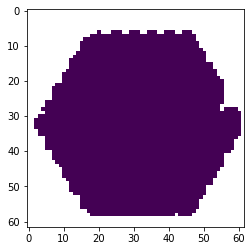

In [24]:
#print(flux_elines[0])
print(flux_elines[0]['3686.83']['EW'])
plt.imshow(flux_elines[0]['3686.83']['EW'])

In [25]:
hdu=fits.open('fitsfiles/IC342_mean_fe_table.fits.gz')
tab_mean=Table.read(hdu[1])
tab_std=Table.read(hdu[2])


[ 3.32741419e+01  2.17855466e-01  6.92221173e-01  3.90401447e-01
  2.28579905e-01  2.89445951e-01  2.43905029e-01  1.76369808e+00
  6.71550301e-01  3.67286128e+00  6.41676565e-01 -2.53993908e-02]


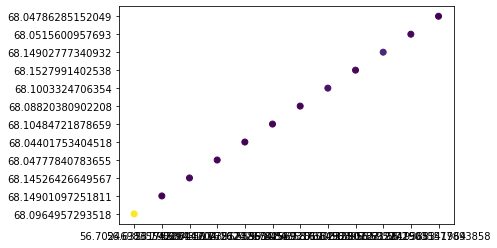

In [34]:
Ha=tab_mean['flux_Ha'].value
print(Ha.astype(float))
plt.scatter(tab_mean['RA'],tab_mean['DEC'],c=Ha.astype(float))